In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import preprocessing
import visualization
import librosa
from copy import deepcopy as dc

In [2]:
signal_8zt = ['8h_8zt_2023_2_07-ch1','8h_8zt_2023_2_07-ch2','8h_8zt_2023_2_07-ch3','8h_8zt_2023_2_07-ch4','8h_8zt_2023_2_07-ch6','8h_8zt_2023_2_07-ch8',
              '8hour_8zt_2022-10-08-ch2','8hour_8zt_2022-10-08-ch4','8hour_8zt_2022-10-08-ch6','8hour_8zt_2022-10-08-ch7',
              '8hr_8zt_10-18-2022-ch1','8hr_8zt_10-18-2022-ch3','8hr_8zt_10-18-2022-ch4','8hr_8zt_10-18-2022-ch5','8hr_8zt_10-18-2022-ch6',
              '8hr_8zt_2022_01_23-ch2','8hr_8zt_2022_01_23-ch3','8hr_8zt_2022_01_23-ch8',
              '8hr_8zt_2022_12_28-ch3','8hr_8zt_2022_12_28-ch4','8hr_8zt_2022_12_28-ch5','8hr_8zt_2022_12_28-ch8'
            ]

analysis_8zt = ['8h_8zt_2023_2_07-ch1_.ANA','8h_8zt_2023_2_07-ch2_.ANA','8h_8zt_2023_2_07-ch3_.ANA','8h_8zt_2023_2_07-ch4_.ANA','8h_8zt_2023_2_07-ch6_.ANA','8h_8zt_2023_2_07-ch8_.ANA',
                '8zt_2022-10-08-ch2_.ANA','8zt_2022-10-08-ch4_.ANA','8zt_2022-10-08-ch6_.ANA','8zt_2022-10-08-ch7_.ANA',
                '8zt_2022-10-18-ch1_.ANA','8zt_2022-10-18-ch3_.ANA','8zt_2022-10-18-ch4_.ANA','8zt_2022-10-18-ch5_.ANA','8zt_2022-10-18-ch6_.ANA',
                '8hr_8zt_2022_01_23-ch2_.ANA','8hr_8zt_2022_01_23-ch3_.ANA','8hr_8zt_2022_01_23-ch8_.ANA',
                '8hr_8zt_2022_12_28-ch3_.ANA','8hr_8zt_2022_12_28-ch4_.ANA','8hr_8zt_2022_12_28-ch5_.ANA','8hr_8zt_2022_12_28-ch8_.ANA'
                ]  

signal_0zt = ['8hr_0zt_2022-10-01-ch1','8hr_0zt_2022-10-01-ch3','8hr_0zt_2022-10-01-ch5','8hr_0zt_2022-10-01-ch6','8hr_0zt_2022-10-01-ch7','8hr_0zt_2022-10-01-ch8',
            '8hr_0zt_10-19-2022-ch1','8hr_0zt_10-19-2022-ch2','8hr_0zt_10-19-2022-ch3','8hr_0zt_10-19-2022-ch6','8hr_0zt_10-19-2022-ch8',
            '8h_0zt_2023_2_5-ch1','8h_0zt_2023_2_5-ch2','8h_0zt_2023_2_5-ch3','8h_0zt_2023_2_5-ch5','8h_0zt_2023_2_5-ch7','8h_0zt_2023_2_5-ch8',
            '8h_0zt_2023_2_6-ch1','8h_0zt_2023_2_6-ch2','8h_0zt_2023_2_6-ch3','8h_0zt_2023_2_6-ch4','8h_0zt_2023_2_6-ch5','8h_0zt_2023_2_6-ch6','8h_0zt_2023_2_6-ch8'
            ]

analysis_0zt = ['0zt_22-10-01-ch1_.ANA','0zt_22-10-01-ch3_.ANA','0zt_22-10-01-ch5_.ANA','0zt_22-10-01-ch6_.ANA','0zt_22-10-01-ch7_.ANA','0zt_22-10-01-ch8_.ANA',
                '0zt_22-10-19-ch1_.ANA','0zt_22-10-19-ch2_.ANA','0zt_22-10-19-ch3_.ANA','0zt_22-10-19-ch6_.ANA','0zt_22-10-19-ch8_.ANA',
                '0zt_2023_2_5-ch1_.ANA','0zt_2023_2_5-ch2_.ANA','0zt_2023_2_5-ch3_.ANA','0zt_2023_2_5-ch5_.ANA','0zt_2023_2_5-ch7_.ANA','0zt_2023_2_5-ch8_.ANA',
                '0zt_2023_2_6-ch1_.ANA','0zt_2023_2_6-ch2_.ANA','0zt_2023_2_6-ch3_.ANA','0zt_2023_2_6-ch4_.ANA','0zt_2023_2_6-ch5_.ANA','0zt_2023_2_6-ch6_.ANA','0zt_2023_2_6-ch8_.ANA'
                ]  

extension = ['.A01','.A02','.A03','.A04','.A05','.A06','.A07','.A08']

In [3]:
#Read train/test data
filename_test_8zt = ['8h_8zt_2023_2_07-ch8','8hour_8zt_2022-10-08-ch7','8hr_8zt_10-18-2022-ch6','8hr_8zt_2022_01_23-ch8','8hr_8zt_2022_12_28-ch8']
analysis_filename_test_8zt = ['8h_8zt_2023_2_07-ch8_.ANA','8zt_2022-10-08-ch7_.ANA','8zt_2022-10-18-ch6_.ANA','8hr_8zt_2022_01_23-ch8_.ANA','8hr_8zt_2022_12_28-ch8_.ANA']
filename_8zt = dc(signal_8zt)
analysis_filename_8zt = dc(analysis_8zt)
for i in range(len(filename_test_8zt)):
    filename_8zt.remove(filename_test_8zt[i])
    analysis_filename_8zt.remove(analysis_filename_test_8zt[i])


filename_test_0zt = ['8hr_0zt_2022-10-01-ch8','8hr_0zt_10-19-2022-ch8','8h_0zt_2023_2_5-ch8','8h_0zt_2023_2_6-ch8']
analysis_filename_test_0zt = ['0zt_22-10-01-ch8_.ANA','0zt_22-10-19-ch8_.ANA','0zt_2023_2_5-ch8_.ANA','0zt_2023_2_6-ch8_.ANA']
filename_0zt = dc(signal_0zt)
analysis_filename_0zt = dc(analysis_0zt)
for i in range(len(filename_test_0zt)):
    filename_0zt.remove(filename_test_0zt[i])
    analysis_filename_0zt.remove(analysis_filename_test_0zt[i])

filename = filename_0zt + filename_8zt
analysis_filename = analysis_filename_0zt + analysis_filename_8zt

filename_test = filename_test_0zt + filename_test_8zt
analysis_filename_test = analysis_filename_test_0zt + analysis_filename_test_8zt

n_recordings = len(filename)
n_test_recordings = len(filename_test)

def generate_signal_dictionary(data = {},data_test = {},outlier_filter = False, downsampling = False, denoising = False):
    os.chdir('C:\\Users\\My PC\\Desktop\\Data from Daniel\\8zt')
    for i in range(len(filename_8zt)):
        data[filename_8zt[i]] = [preprocessing.read_wave(filename_8zt[i],extension),preprocessing.read_analysis(analysis_filename_8zt[i])]
        if outlier_filter == True:
            data[filename_8zt[i]] = preprocessing.outlier_filtering(data[filename_8zt[i]][0],data[filename_8zt[i]][1])
        if downsampling == True:
            data[filename_8zt[i]] = preprocessing.downsampling(data[filename_8zt[i]][0],data[filename_8zt[i]][1])
        if denoising == True:
            data[filename_8zt[i]][0] = preprocessing.wavelet_denoising(data[filename_8zt[i]][0],wavelet = 'sym4',n_level = 5)

    for i in range(len(filename_test_8zt)):
        data_test[filename_test_8zt[i]] = [preprocessing.read_wave(filename_test_8zt[i],extension),preprocessing.read_analysis(analysis_filename_test_8zt[i])]
        if outlier_filter == True:
            data_test[filename_test_8zt[i]] = preprocessing.outlier_filtering(data_test[filename_test_8zt[i]][0],data_test[filename_test_8zt[i]][1])
        if downsampling == True:
            data_test[filename_test_8zt[i]] = preprocessing.downsampling(data_test[filename_test_8zt[i]][0],data_test[filename_test_8zt[i]][1])
        if denoising == True:
            data_test[filename_test_8zt[i]][0] = preprocessing.wavelet_denoising(data_test[filename_test_8zt[i]][0],wavelet = 'sym4',n_level = 5)

    os.chdir('C:\\Users\\My PC\\Desktop\\Data from Daniel\\0zt')
    for i in range(len(filename_0zt)):
        data[filename_0zt[i]] = [preprocessing.read_wave(filename_0zt[i],extension),preprocessing.read_analysis(analysis_filename_0zt[i])]
        if outlier_filter == True:
            data[filename_0zt[i]] = preprocessing.outlier_filtering(data[filename_0zt[i]][0],data[filename_0zt[i]][1])
        if downsampling == True:
            data[filename_0zt[i]] = preprocessing.downsampling(data[filename_0zt[i]][0],data[filename_0zt[i]][1])
        if denoising == True:
            data[filename_0zt[i]][0] = preprocessing.wavelet_denoising(data[filename_0zt[i]][0],wavelet = 'sym4',n_level = 5)
    for i in range(len(filename_test_0zt)):
        data_test[filename_test_0zt[i]] = [preprocessing.read_wave(filename_test_0zt[i],extension),preprocessing.read_analysis(analysis_filename_test_0zt[i])]
        if outlier_filter == True:
            data_test[filename_test_0zt[i]] = preprocessing.outlier_filtering(data_test[filename_test_0zt[i]][0],data_test[filename_test_0zt[i]][1])
        if downsampling == True:
            data_test[filename_test_0zt[i]] = preprocessing.downsampling(data_test[filename_test_0zt[i]][0],data_test[filename_test_0zt[i]][1])
        if denoising == True:
            data_test[filename_test_0zt[i]][0] = preprocessing.wavelet_denoising(data_test[filename_test_0zt[i]][0],wavelet = 'sym4',n_level = 5)
    os.chdir('C:\\Users\\My PC\\Desktop\\Data from Daniel')
    
    return data, data_test

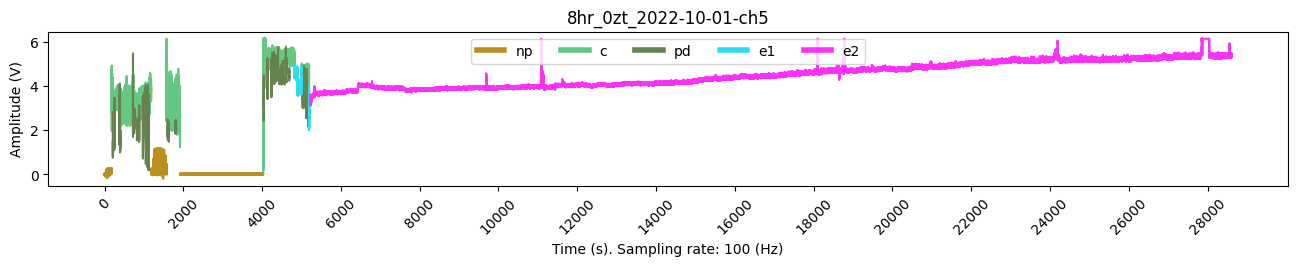

In [6]:
filename = ['8hr_0zt_2022-10-01-ch5']
analysis_filename = ['0zt_22-10-01-ch5_.ANA']
extension = ['.A01','.A02','.A03','.A04','.A05','.A06','.A07','.A08']
os.chdir('C:\\Users\\My PC\\Desktop\\Data from Daniel\\0zt')
data = {}
data[filename[0]] = [preprocessing.read_wave(filename[0],extension),preprocessing.read_analysis(analysis_filename[0])]
data[filename[0]] = preprocessing.outlier_filtering(data[filename[0]][0],data[filename[0]][1])

wave_array = data[filename[0]][0]
ana = data[filename[0]][1]

visualization.visualize_wave(wave_array,ana)
plt.title(f'{filename[0]}')
plt.show()

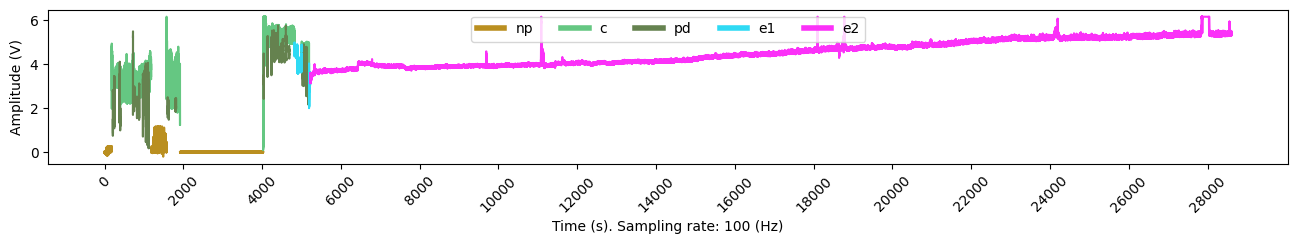

In [7]:
filename = ['8hr_0zt_2022-10-01-ch5']
analysis_filename = ['0zt_22-10-01-ch5_.ANA']
extension = ['.A01','.A02','.A03','.A04','.A05','.A06','.A07','.A08']
os.chdir('C:\\Users\\My PC\\Desktop\\Data from Daniel\\0zt')
data = {}
data[filename[0]] = [preprocessing.read_wave(filename[0],extension),preprocessing.read_analysis(analysis_filename[0])]
data[filename[0]] = preprocessing.outlier_filtering(data[filename[0]][0],data[filename[0]][1])

wave_array = data[filename[0]][0]
ana = data[filename[0]][1]

visualization.visualize_wave(wave_array,ana)

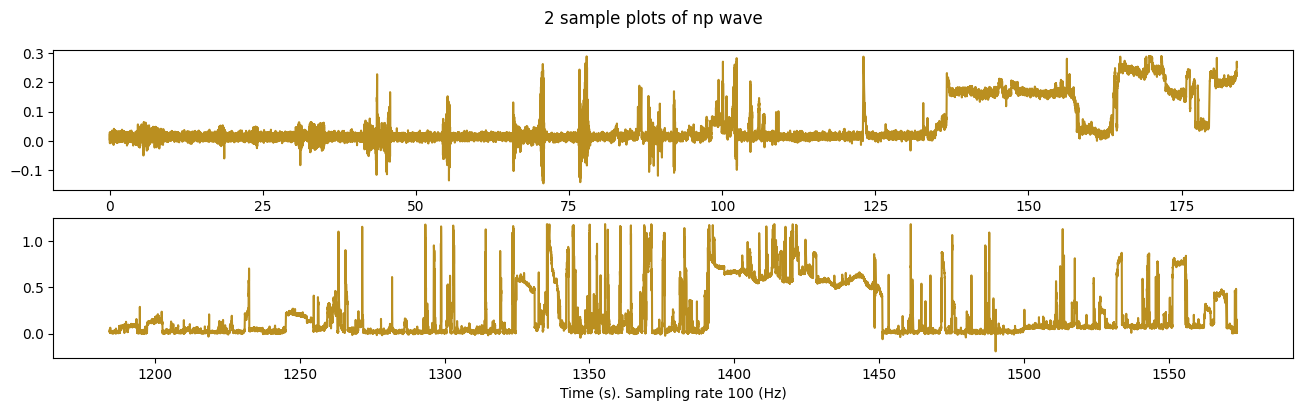

In [8]:
visualization.visualize_wave(wave_array,ana,'np',n_plots = 2)

# Wavelet transform

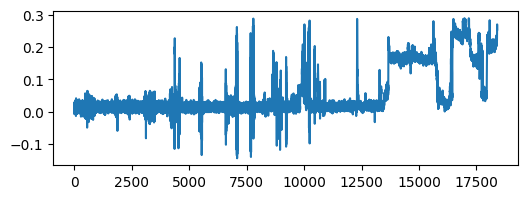

In [9]:
def extract_sample(wave_array,ana,wave_type,which):
    wave_indices = preprocessing.get_index(ana)
    start,end = wave_indices[wave_type][which]
    return wave_array[start:end]

sample = extract_sample(wave_array,ana,'np',0)
plt.figure(figsize=(6,2))
plt.plot(sample)

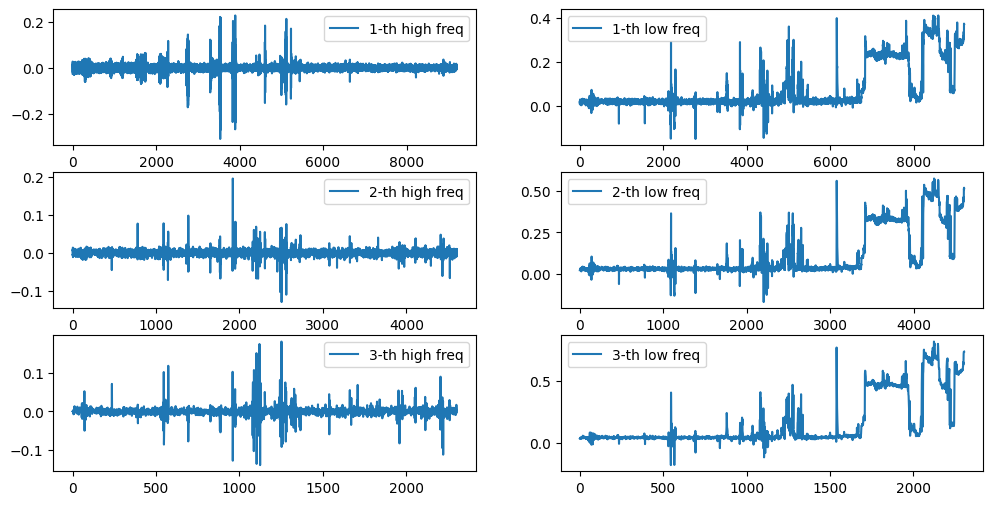

In [10]:
low_freq,high_freq = preprocessing.get_wavelet_coefficients(sample,'sym4',n_level=3)
visualization.visualize_wavelet_coefficients(low_freq,high_freq)

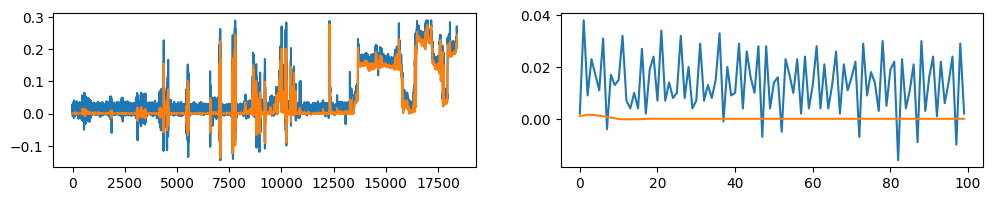

In [11]:
_,(ax1,ax2) = plt.subplots(1,2,figsize = (12,2))
denoised_sample = preprocessing.wavelet_denoising(sample,'sym4',3)
ax1.plot(sample)
ax1.plot(denoised_sample)
ax2.plot(sample[200:300])
ax2.plot(denoised_sample[200:300])

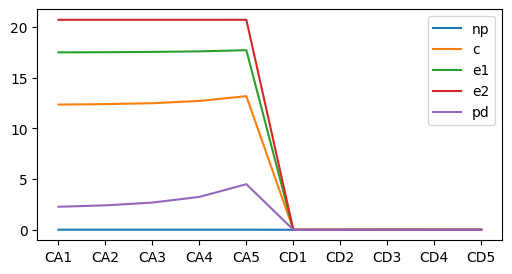

In [13]:
wave_array = data[filename[0]][0]
ana = data[filename[0]][1]

npw = preprocessing.extract_sample(wave_array,ana,'np',0)
c = preprocessing.extract_sample(wave_array,ana,'c',0)
e1 = preprocessing.extract_sample(wave_array,ana,'e1',0)
e2 = preprocessing.extract_sample(wave_array,ana,'e2',0)
pd = preprocessing.extract_sample(wave_array,ana,'pd',0)

samples = [npw,c,e1,e2,pd]
name = ['np','c','e1','e2','pd']

plt.figure(figsize = (6,3))
for i in range(5):
    low_freq,high_freq = preprocessing.get_wavelet_coefficients(samples[i],'sym4',5)
    ae_low, ae_high = preprocessing.average_energy(low_freq,high_freq)
    plt.plot(ae_low+ae_high,label = name[i])

plt.xticks(ticks = np.arange(0,2*len(ae_low)),labels = [f'CA{k+1}' for k in range(5)] + [f'CD{k+1}' for k in range(5)])
plt.legend()
plt.show()

In [23]:
d,lab = preprocessing.generate_model_data(data)
enc = preprocessing.numeric_encoder()
lab = enc.fit_transform(lab)
print(np.unique(lab,return_counts = True))
print(enc.labels_dict)

Included files: ['8hr_0zt_2022-10-01-ch5']
Model data shape: (11340, 1024),label shape: (11340,)
(array([0, 1, 2, 3, 5]), array([1037,  744,   76, 9133,  350], dtype=int64))
{'np': 0, 'c': 1, 'e1': 2, 'e2': 3, 'f': 4, 'pd': 5, 'g': 6}


In [93]:
from EntropyHub import SpecEn

In [97]:
SpecEn(d[2,:])[0]

0.3813007077580171

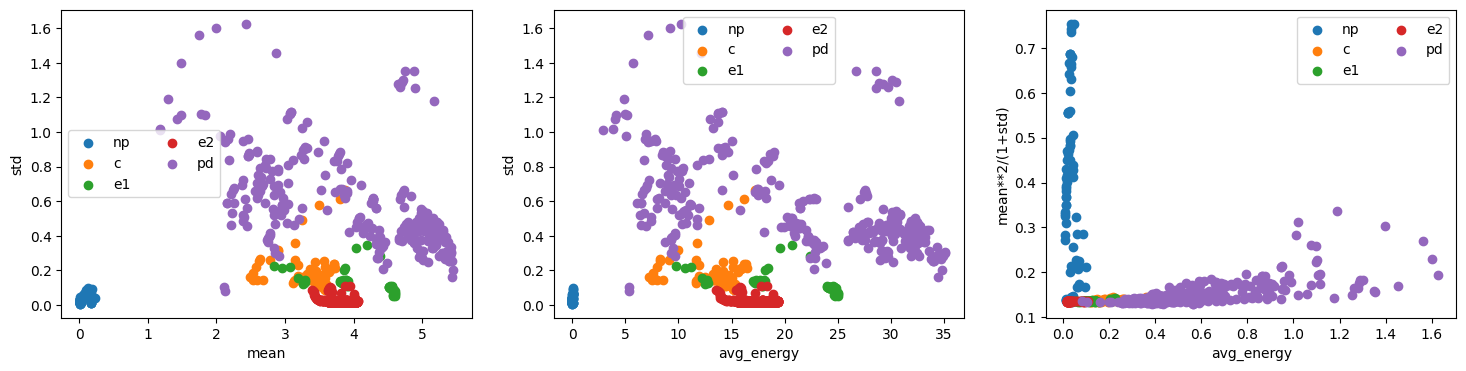

In [99]:
info_np = []
info_c = []
info_e1 = []
info_e2 = []
info_f = []
info_pd = []
info = [info_np,info_c,info_e1,info_e2,info_f,info_pd]
for i in range(len(d)):
    low_freq,high_freq = preprocessing.get_wavelet_coefficients(d[i,:],'sym4',5)
    low_freq,_ = preprocessing.average_energy(low_freq,high_freq)
    info[lab[i]].append([np.mean(d[i,:]),np.std(d[i,:]),low_freq[4],SpecEn(d[i,:])[0]])

plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
n = 75
plt.scatter(np.array(info[0])[:n,0],np.array(info[0])[:n,1],label = 'np')
plt.scatter(np.array(info[1])[:n,0],np.array(info[1])[:n,1],label = 'c')
plt.scatter(np.array(info[2])[:n,0],np.array(info[2])[:n,1],label = 'e1')
plt.scatter(np.array(info[3])[:1000,0],np.array(info[3])[:1000,1],label = 'e2')
# plt.scatter(np.array(info[4])[:n,0],np.array(info[4])[:n,1],label = 'f')
plt.scatter(np.array(info[5])[:500,0],np.array(info[5])[:500,1],label = 'pd')
plt.legend(ncol = 2)
plt.xlabel('mean')
plt.ylabel('std')

plt.subplot(1,3,2)
n = 75
plt.scatter(np.array(info[0])[:n,2],np.array(info[0])[:n,1],label = 'np')
plt.scatter(np.array(info[1])[:n,2],np.array(info[1])[:n,1],label = 'c')
plt.scatter(np.array(info[2])[:n,2],np.array(info[2])[:n,1],label = 'e1')
plt.scatter(np.array(info[3])[:1000,2],np.array(info[3])[:1000,1],label = 'e2')
# plt.scatter(np.array(info[4])[:n,2],np.array(info[4])[:n,1],label = 'f')
plt.scatter(np.array(info[5])[:500,2],np.array(info[5])[:500,1],label = 'pd')
plt.legend(ncol = 2)
plt.xlabel('avg_energy')
plt.ylabel('std')

plt.subplot(1,3,3)
n = 75
plt.scatter(np.array(info[0])[:n,1],np.array(info[0])[:n,3],label = 'np')
plt.scatter(np.array(info[1])[:n,1],np.array(info[1])[:n,3],label = 'c')
plt.scatter(np.array(info[2])[:n,1],np.array(info[2])[:n,3],label = 'e1')
plt.scatter(np.array(info[3])[:n,1],np.array(info[3])[:n,3],label = 'e2')
# plt.scatter(np.array(info[4])[:n,1],np.array(info[4])[:n,3],label = 'f')
plt.scatter(np.array(info[5])[:500,1],np.array(info[5])[:500,3],label = 'pd')
plt.legend(ncol = 2)
plt.xlabel('avg_energy')
plt.ylabel('mean**2/(1+std)')
plt.show()

# Filter the Outlier

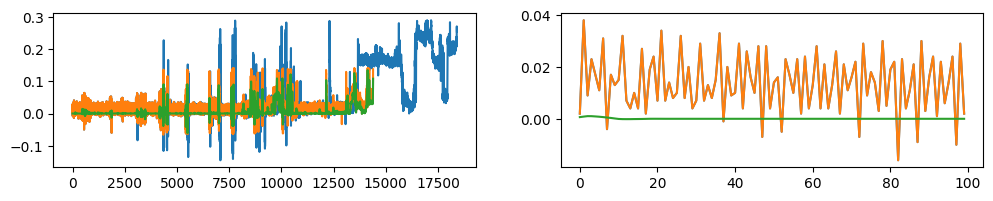

In [306]:
_,(ax1,ax2) = plt.subplots(1,2,figsize = (12,2))
outlier_filtered_sample = preprocessing.outlier_filtering(wave_array = sample,option = 'indiv')
outlier_filtered_denoised_sample = preprocessing.wavelet_denoising(outlier_filtered_sample,'sym4',3)
ax1.plot(sample)
ax1.plot(outlier_filtered_sample)
ax1.plot(outlier_filtered_denoised_sample)
ax2.plot(sample[200:300])
ax2.plot(outlier_filtered_sample[200:300])
ax2.plot(outlier_filtered_denoised_sample[200:300])


# Fast Fourier transform

n_coefs: 513,n_windows: 68
n_coefs: 513,n_windows: 7
Shorter than window_size
n_coefs: 513,n_windows: 5
n_coefs: 513,n_windows: 67


c:\Users\My PC\Desktop\Data from Daniel\visualization.py:96: RuntimeWarning: divide by zero encountered in log
  wave_sample_stft = np.log(wave_sample_stft)


n_coefs: 513,n_windows: 9133


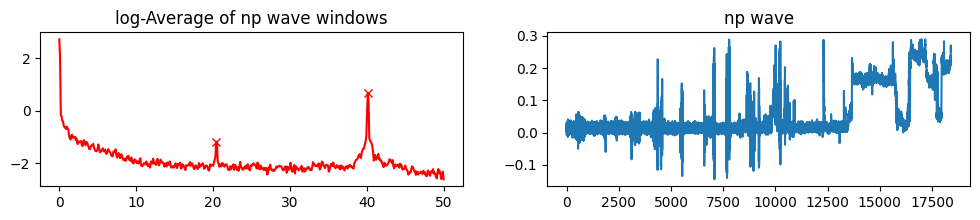

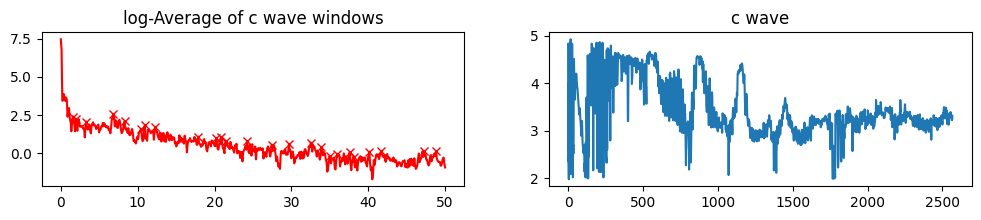

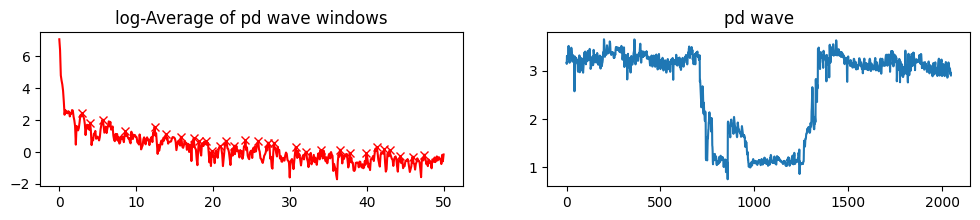

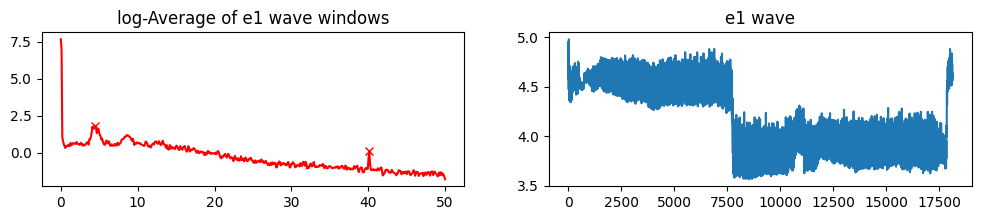

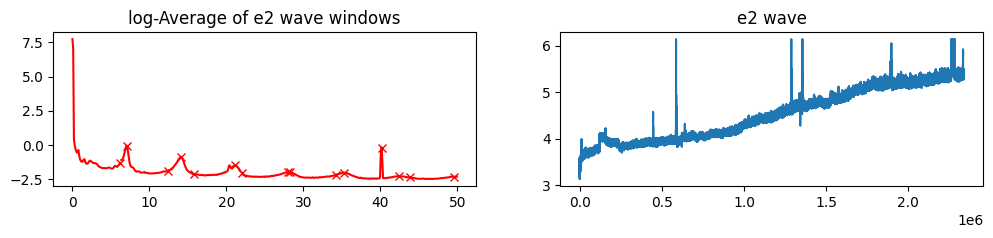

In [14]:
visualization.visualize_fft_coefficients(wave_array,ana,'np',0,True)
visualization.visualize_fft_coefficients(wave_array,ana,'c',0,True)
visualization.visualize_fft_coefficients(wave_array,ana,'pd',0,True)
visualization.visualize_fft_coefficients(wave_array,ana,'e1',0,True)
visualization.visualize_fft_coefficients(wave_array,ana,'e2',0,True)

n_coefs: 513,n_windows: 9133


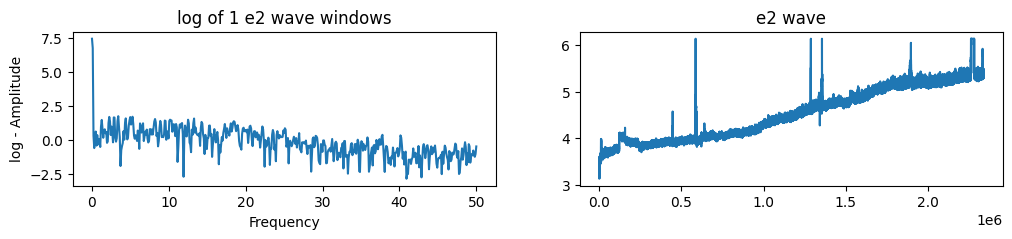

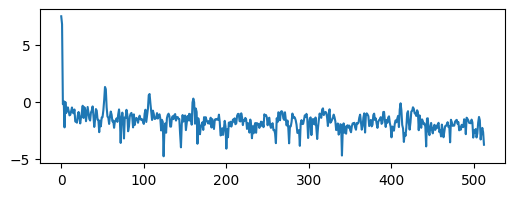

In [322]:
visualization.visualize_fft_coefficients(wave_array,ana,'e2',0,False,n_wind = 1)
i = 30
e2 = extract_sample(wave_array,ana,'e2',0)[1024*i:1024*(i+1)]
plt.figure(figsize = (6,2))
plt.plot(np.log(np.abs(librosa.stft(e2,n_fft=1024,center = False))))

In [ ]:
# import numpy as np
# class real_time_peak_detection():
#     def __init__(self, array, lag, threshold, influence):
#         self.y = list(array)
#         self.length = len(self.y)
#         self.lag = lag
#         self.threshold = threshold
#         self.influence = influence
#         self.signals = [0] * len(self.y)
#         self.filteredY = np.array(self.y).tolist()
#         self.avgFilter = [0] * len(self.y)
#         self.stdFilter = [0] * len(self.y)
#         self.avgFilter[self.lag - 1] = np.mean(self.y[0:self.lag]).tolist()
#         self.stdFilter[self.lag - 1] = np.std(self.y[0:self.lag]).tolist()

#     def thresholding_algo(self, new_value):
#         self.y.append(new_value)
#         i = len(self.y) - 1
#         self.length = len(self.y)
#         if i < self.lag:
#             return 0
#         elif i == self.lag:
#             self.signals = [0] * len(self.y)
#             self.filteredY = np.array(self.y).tolist()
#             self.avgFilter = [0] * len(self.y)
#             self.stdFilter = [0] * len(self.y)
#             self.avgFilter[self.lag] = np.mean(self.y[0:self.lag]).tolist()
#             self.stdFilter[self.lag] = np.std(self.y[0:self.lag]).tolist()
#             return 0

#         self.signals += [0]
#         self.filteredY += [0]
#         self.avgFilter += [0]
#         self.stdFilter += [0]

#         if abs(self.y[i] - self.avgFilter[i - 1]) > (self.threshold * self.stdFilter[i - 1]):

#             if self.y[i] > self.avgFilter[i - 1]:
#                 self.signals[i] = 1
#             else:
#                 self.signals[i] = -1

#             self.filteredY[i] = self.influence * self.y[i] + \
#                 (1 - self.influence) * self.filteredY[i - 1]
#             self.avgFilter[i] = np.mean(self.filteredY[(i - self.lag):i])
#             self.stdFilter[i] = np.std(self.filteredY[(i - self.lag):i])
#         else:
#             self.signals[i] = 0
#             self.filteredY[i] = self.y[i]
#             self.avgFilter[i] = np.mean(self.filteredY[(i - self.lag):i])
#             self.stdFilter[i] = np.std(self.filteredY[(i - self.lag):i])

#         return self.signals[i]

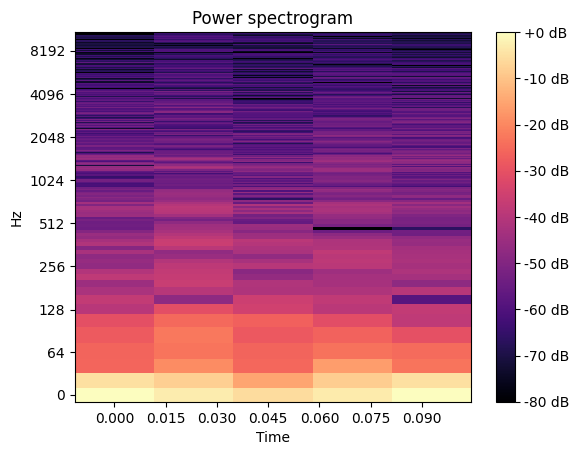

In [205]:
import matplotlib.pyplot as plt
# sample = extract_sample(wave_array,ana,'pd',0)[4096:6120]

coef = np.abs(librosa.stft(wave_array[start:end],n_fft=1024,center = False))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(coef,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [100]:
# from scipy.signal import find_peaks
# plt.figure(figsize = (6,3))
# peaks = {c:coef[c] for c in peaks_idx}
# greatest_peaks_idx = sorted(peaks,key=peaks.get,reverse=True)[:5]
# peaks_features = coef[greatest_peaks_idx]
# peaks_features = peaks_features/np.linalg.norm(peaks_features,2)
# sample = extract_sample(wave_array,ana,'c',7)
# coef = np.log(np.abs(librosa.stft(sample,n_fft = 1024,center = False)))
# coef = np.sum(coef,axis = 1)/coef.shape[1] #average
# peaks_idx = find_peaks(coef,prominence = 0.7)[0]
# plt.plot(peaks_idx, coef[peaks_idx ], "xr"); plt.plot(coef); plt.legend(['distance'])

In [101]:
# from peakdetect import peakdetect
# sample = extract_sample(wave_array,ana,'c',7)
# coef = np.log(np.abs(librosa.stft(sample,n_fft = 1024,center = False)))
# coef = np.sum(coef,axis = 1)/coef.shape[1] #average
# # coef = np.log(np.sum(stft_coef,axis=0))/stft_coef.shape[0]

# peaks = peakdetect(coef, lookahead=15) 
# # Lookahead is the distance to look ahead from a peak to determine if it is the actual peak. 
# # Change lookahead as necessary 
# higherPeaks = np.array(peaks[0])
# lowerPeaks = np.array(peaks[1])
# plt.plot(coef)
# plt.plot(higherPeaks[:,0], higherPeaks[:,1], 'ro')
# plt.plot(lowerPeaks[:,0], lowerPeaks[:,1], 'ko')

In [118]:
wave_idx = preprocessing.get_index(ana)

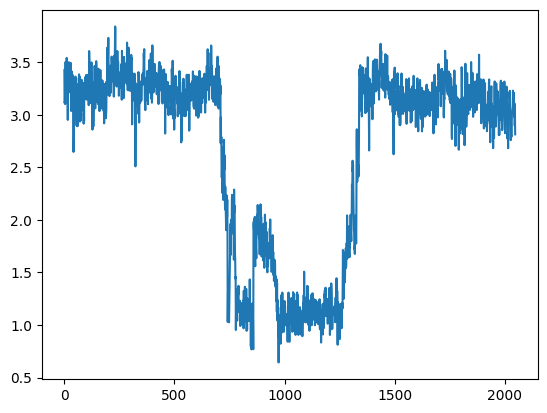

In [250]:
start,end = wave_idx['pd'][0]
start,end = (start+end)//2 - 1024, (start+end)//2 + 1024
plt.plot(wave_array[start:end]+np.random.normal(0,0.1,2048))

array([ 0.01576081, -0.16335219,  0.06533474, ..., -0.00630936,
       -0.06200769,  0.16292768])

In [231]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the `~numpy.random.Generator.normal`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
     

In [172]:
def upsample(wave_array):
    up = np.zeros(len(wave_array)*2)
    for i in range(len(wave_array)):
        up[2*i] = wave_array[i]
    for i in range(len(wave_array)-1):
        up[2*i+1] = (up[2*i]+ up[2*i+2])/2
    return up

In [218]:
sample = preprocessing.extract_sample(wave_array,ana,'np',0)

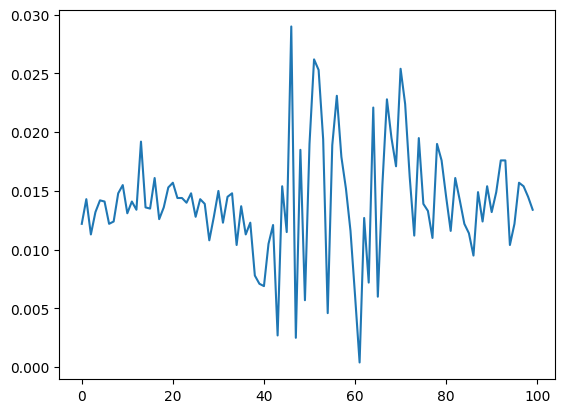

In [219]:
plt.plot(preprocessing.downsampling(sample)[0:100])

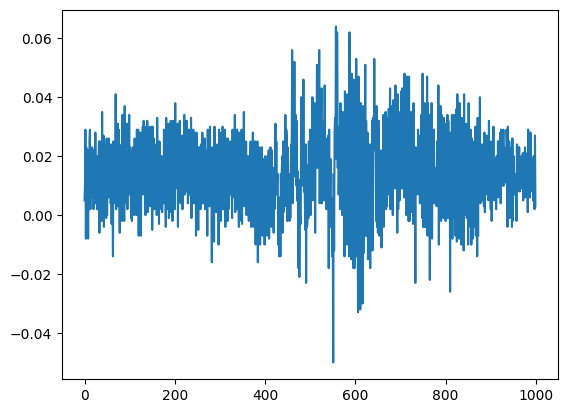

In [222]:
plt.plot(sample[0:1000])

In [ ]:
[]